<h1 align="center">Volume 4: Spectral 2.</h1>

    Samuel
    Section 002
    25 January 2023

In [1]:
import numpy as np
from scipy.fftpack import fft, ifft
import matplotlib
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample Code

<IPython.core.display.Javascript object>


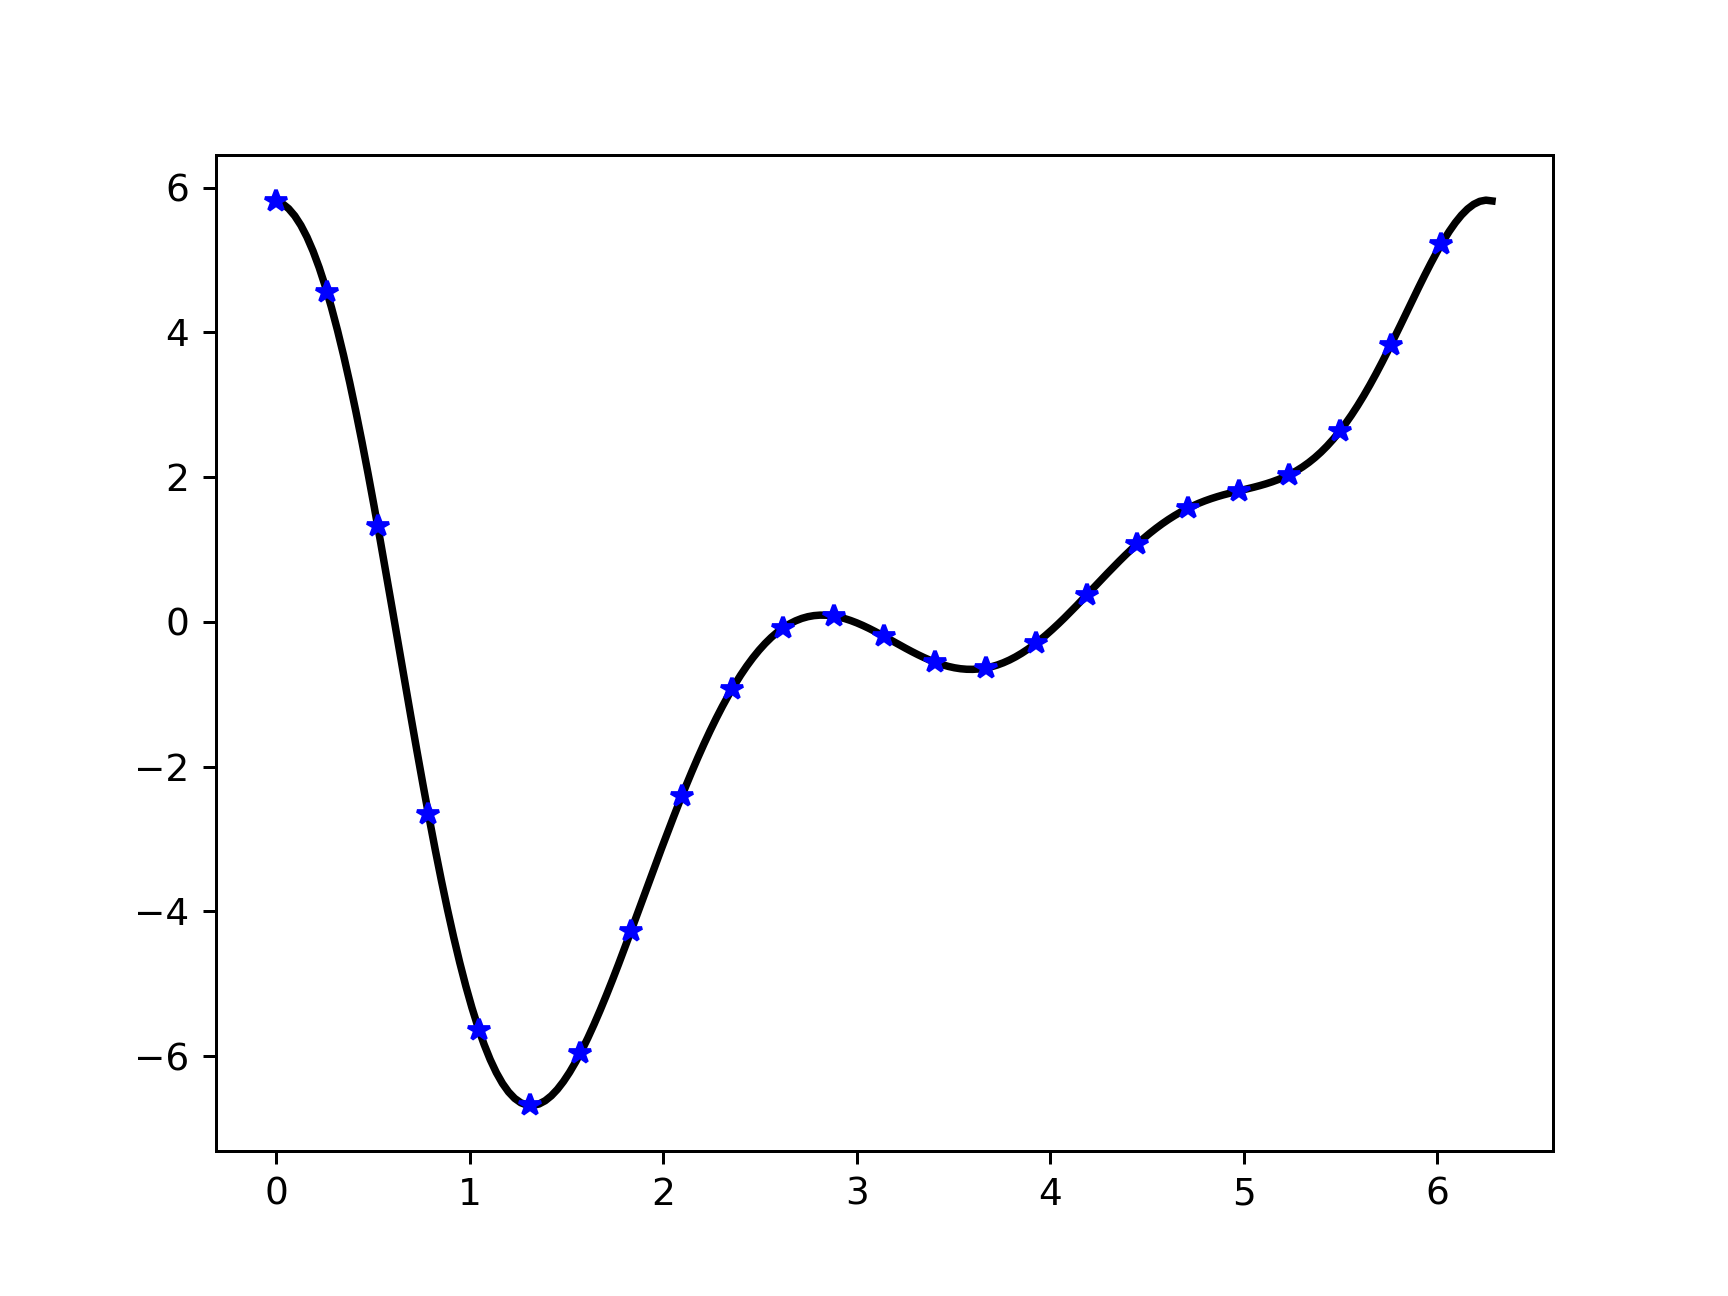

In [2]:
N=24
x1 = (2.*np.pi/N)*np.arange(N)
f = np.sin(x1)**2.*np.cos(x1) + np.exp(2.*np.sin(x1+1))

k = np.concatenate(( np.arange(0,N/2) ,
                    np.array([0]) , # Because hat{f}'(k) at k = N/2 is zero.
                    np.arange(-N/2+1,0) ))

# Approximates the derivative using the pseudospectral method
f_hat = fft(f)
fp_hat = ((1j*k)*f_hat)
fp = np.real(ifft(fp_hat))

# Calculates the derivative analytically
x2 = np.linspace(0,2*np.pi,200)
derivative = (2.*np.sin(x2)*np.cos(x2)**2. -
              np.sin(x2)**3. +
              2*np.cos(x2+1)*np.exp(2*np.sin(x2+1))
             )

plt.plot(x2,derivative,'-k',linewidth=2.)
plt.plot(x1,fp,'*b')
plt.show()

# Problem 1

Create a function
that approximates 1/2u'' − u' on the Fourier grid points for N = 24.

<IPython.core.display.Javascript object>


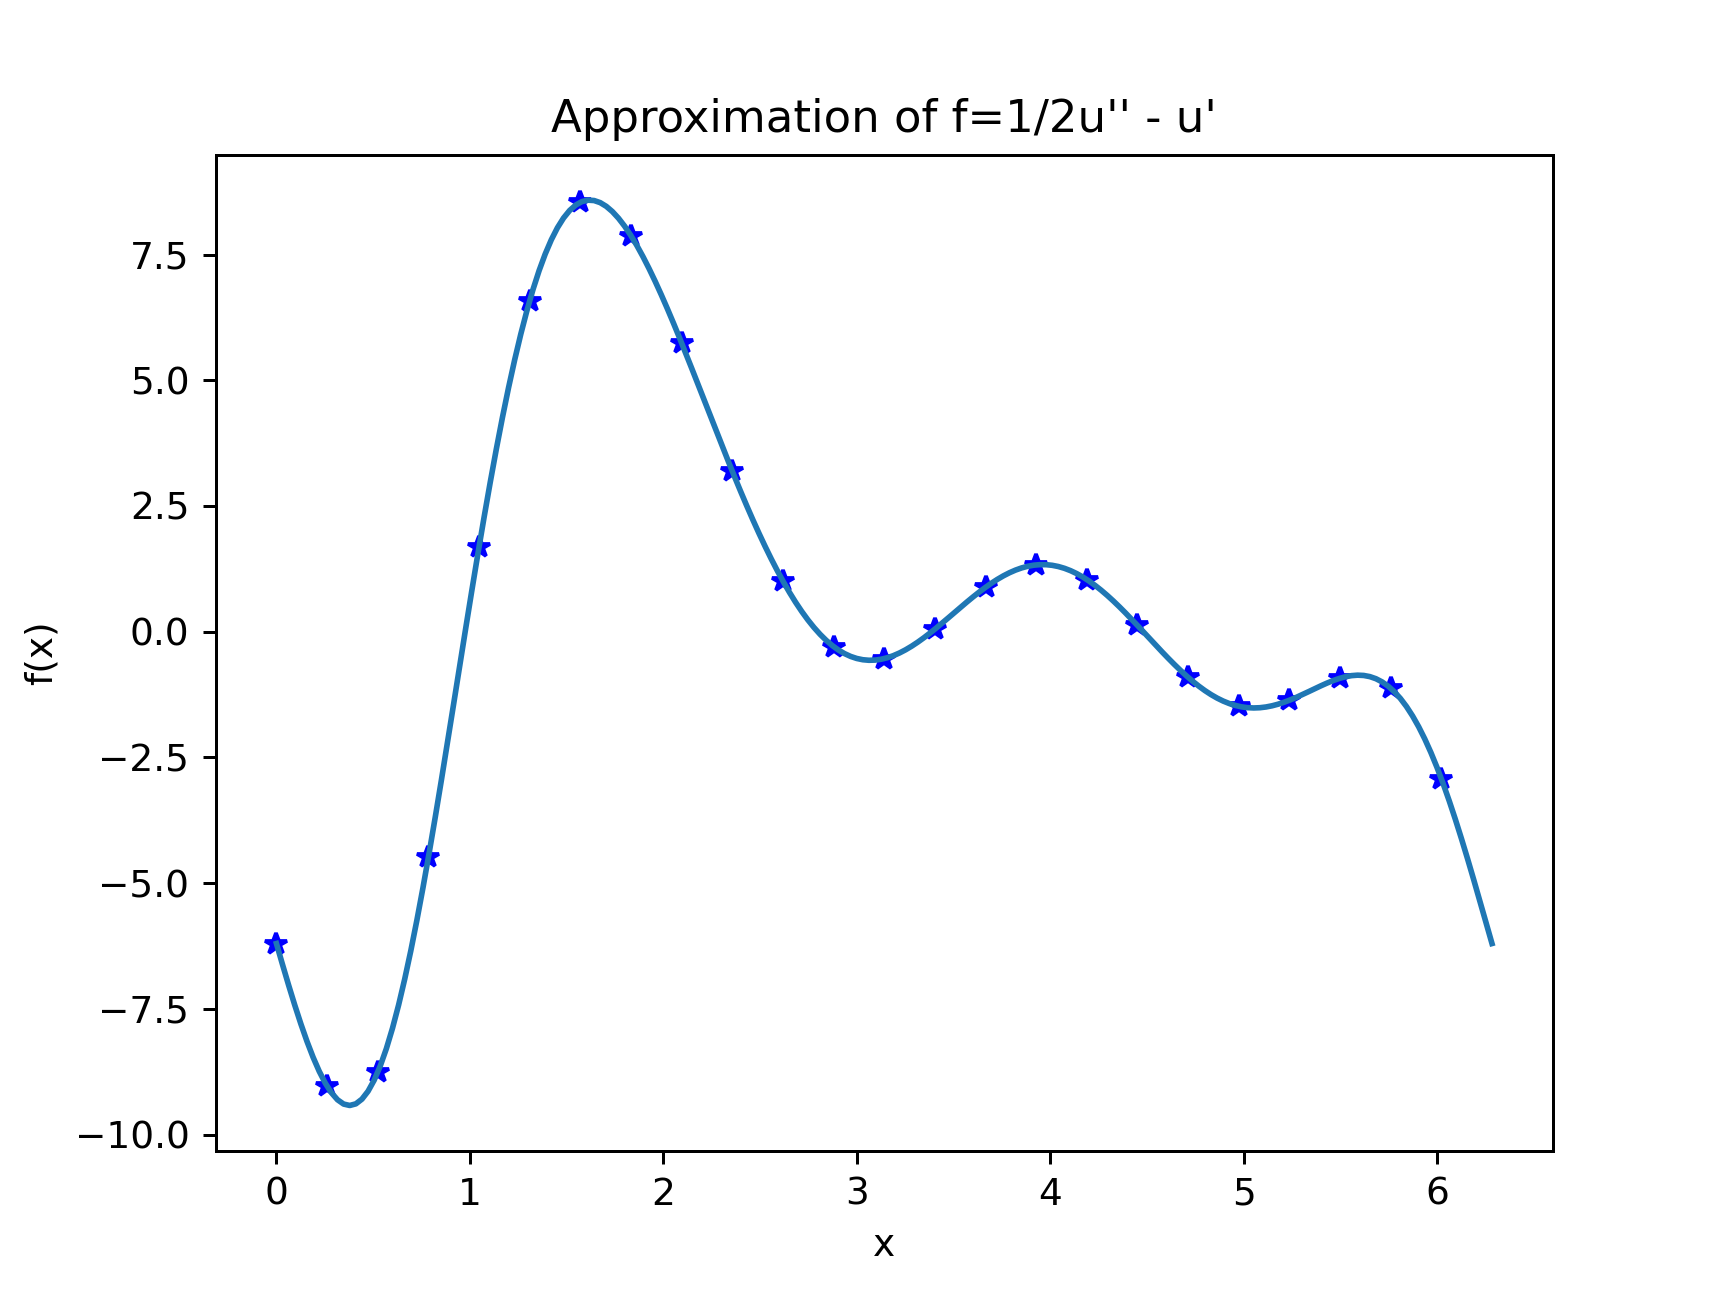

In [3]:
ff_hat = fft(fp)
ffp_hat = ((1j*k)*ff_hat)
fpp = np.real(ifft(ffp_hat))

second_derivative = 2*(-2*np.cos(x2)+3*(np.cos(x2))**3) + -3*(np.sin(x2)**2)*np.cos(x2) + 2*(-np.exp(2*np.sin(x2+1))*np.sin(x2+1) + 2*np.exp(2*np.sin(x2+1))*np.cos(x2+1)**2)
function = 0.5*second_derivative - derivative

plt.plot(x1,0.5*fpp-fp,'*b')
plt.plot(x2,function)
plt.title("Approximation of f=1/2u'' - u'")
plt.ylabel('f(x)')
plt.xlabel('x')
plt.show()

# Problem 2 - setup

In [4]:
def initialize_all(a,b,y0,h):
    n = int((b-a)/h+1)
    X = np.linspace(a,b,n)
    if isinstance(y0,np.ndarray):
        Y = np.empty((n, y0.size))
    else:
        Y = np.empty(n)
    Y[0] = y0
    return X,Y,h,int(n)

def RK4(f, x0,xf, y0, n):
    """
    Uses the Runge-Kutta 4 method to solve the IVP
        y' = f(x, y)
        y(0)=y0
    Arguments:
        f - RHS of ode
        x0, xf - initial and final x values to be evaluated at
        y0 - initial value
        n - number of points
    Returns:
        x, y - arrays of x and y values at every point of solution
    """
    #Create arrays for x and y values
    x, h = np.linspace(x0, xf, n, retstep=True)
    
    if np.isscalar(y0):
        y = np.zeros(n)
        y[0] = y0
    else:
        y = np.zeros((n, y0.shape[0]))
        y[0] = y0
    
    for i in range(n-1):
        K1 = f(x[i], y[i])
        K2 = f(x[i]+h/2, y[i]+h/2*K1)
        K3 = f(x[i]+h/2, y[i]+h/2*K2)
        K4 = f(x[i+1], y[i]+h*K3)
        y[i+1] = y[i] + h/6*(K1+2*K2+2*K3+K4)
    return x, y

# Problem 2 
Using a fourth order Runge-Kutta method (RK4), solve the initial value problem. 
Plot your numerical solution from
t = 0 to t = 8 over 150 time steps and 100 x steps. Note that the initial data is nearly zero
near x = 0 and 2π, and so we can use the pseudospectral method. a Use the following code to
help graph.

<IPython.core.display.Javascript object>


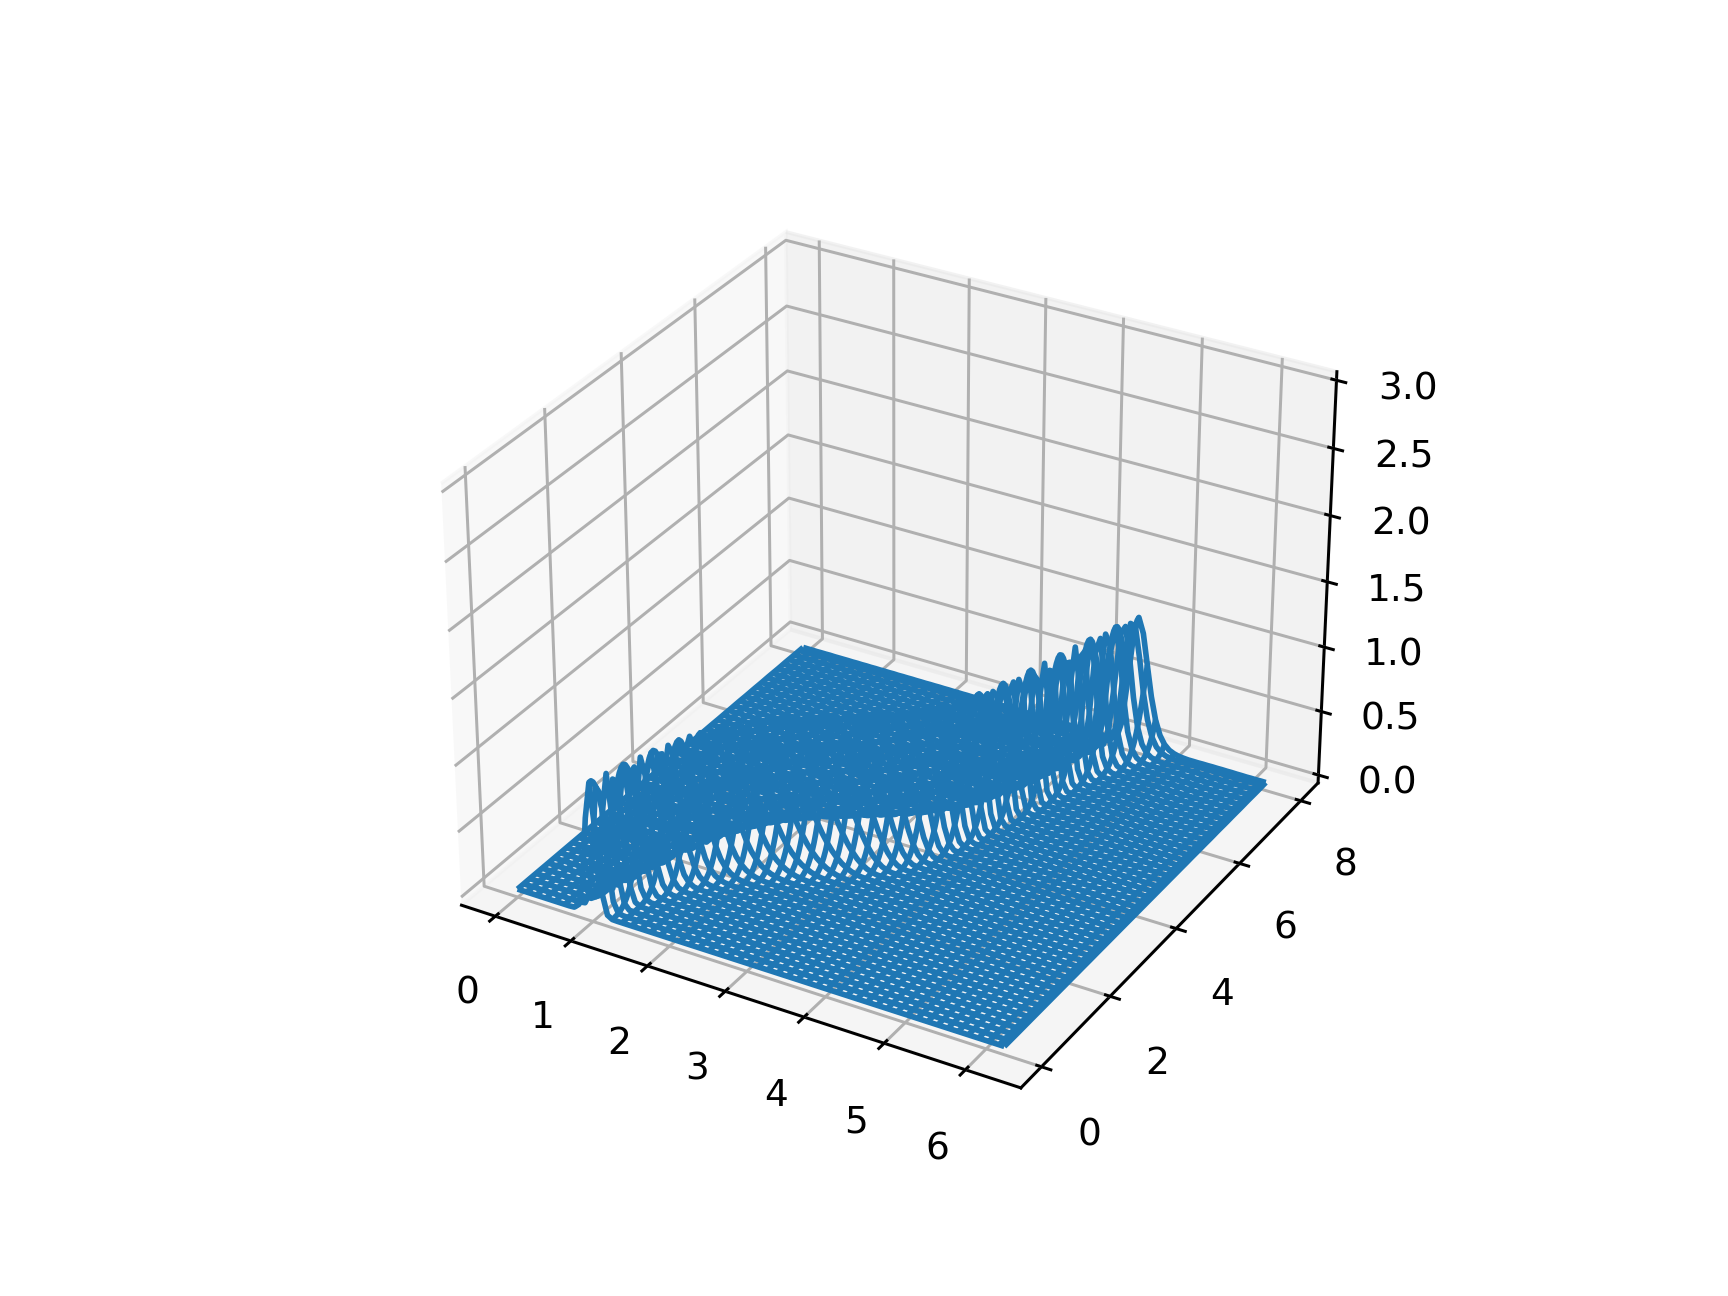

In [10]:
t_steps = 150
x_steps = 100

N=x_steps
x_domain = (2.*np.pi/N)*np.arange(N)
k = np.concatenate(( np.arange(0,N/2) ,
                    np.array([0]) , # Because hat{f}'(k) at k = N/2 is zero.
                    np.arange(-N/2+1,0)))
t_domain = np.linspace(0,8,t_steps)

a,b = 0,2*np.pi
h = 2*np.pi/(x_steps-1)
y0 = np.exp(-100*(np.linspace(a,b,x_steps)-1)**2)

#X,Y,h,n = initialize_all(a,b,y0,h)

c = lambda x: 0.2 + np.sin(x-1)**2.
u0 = lambda x: np.exp(-100*(x-1)**2)

def f(t,u): #thanks Talia!
    F = fft(u)
    ik_F = ((1j*k)*F)
    IF = np.real(ifft(ik_F))
    cUx = c(x_domain)*IF
    return -cUx

t,u = RK4(f,0,8,u0(x_domain),150)

X,Y = np.meshgrid(x_domain, t)
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_wireframe(X,Y,u)
ax.set_zlim(0,3)
plt.show()